# Varying Loss Optimizer

In [8]:
# Imports
import numpy as np

import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torch.optim import SGD, Adam

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt 
%matplotlib inline

# Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
# Load data
data_directory = 'D:/book-implementations/packt-modern-computer-vision-with-pytorch/03-building-deep-nn-with-pytorch/images/FMNIST'
fmnist = datasets.FashionMNIST(
    data_directory,
    download=False,
    train=True
    )

tr_images = fmnist.data
tr_targets = fmnist.targets 

val_fmnist = datasets.FashionMNIST(
    data_directory,
    download=False,
    train=False
    )

val_images = val_fmnist.data 
val_targets = val_fmnist.targets 

### SGD optimizer

In [10]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix] 
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)


def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [11]:
def get_data(): 
    train = FMNISTDataset(tr_images, tr_targets) 
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets) 
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

In [12]:
@torch.no_grad()
def val_loss(x, y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [13]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [14]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(10):

    print("\nEpoch: ", epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    print(f"Loss: {train_epoch_loss}    Accuracy: {train_epoch_accuracy}")

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)

    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)


Epoch:  0
Loss: 0.8390105173428853    Accuracy: 0.8094333333333333

Epoch:  1
Loss: 0.5348657867829005    Accuracy: 0.8309333333333333

Epoch:  2
Loss: 0.482235281030337    Accuracy: 0.8415

Epoch:  3
Loss: 0.45417816798686983    Accuracy: 0.8508

Epoch:  4
Loss: 0.43474865475495655    Accuracy: 0.8503166666666667

Epoch:  5
Loss: 0.419857339934508    Accuracy: 0.8569166666666667

Epoch:  6
Loss: 0.4070895001530647    Accuracy: 0.8626833333333334

Epoch:  7
Loss: 0.39532081806262337    Accuracy: 0.8656

Epoch:  8
Loss: 0.385210853322347    Accuracy: 0.8667

Epoch:  9
Loss: 0.37674884709914525    Accuracy: 0.87175


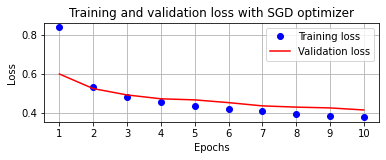

C:\Users\hp\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


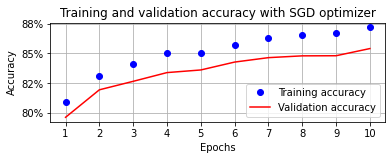

In [15]:
epochs = np.arange(10)+1

plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with SGD optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with SGD optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

### Adam optimizer

In [16]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

In [17]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [18]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(10):

    print("\nEpoch: ", epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    print(f"Loss: {train_epoch_loss}    Accuracy: {train_epoch_accuracy}")

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)

    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)


Epoch:  0
Loss: 0.5329772274335225    Accuracy: 0.833

Epoch:  1
Loss: 0.4299821806232135    Accuracy: 0.8554666666666667

Epoch:  2
Loss: 0.4128292119105657    Accuracy: 0.8617833333333333

Epoch:  3
Loss: 0.40312087707519534    Accuracy: 0.8618666666666667

Epoch:  4
Loss: 0.3907740982492765    Accuracy: 0.8678

Epoch:  5
Loss: 0.3827737973809242    Accuracy: 0.8614

Epoch:  6
Loss: 0.3724472861866156    Accuracy: 0.8669166666666667

Epoch:  7
Loss: 0.36881598635315893    Accuracy: 0.8733166666666666

Epoch:  8
Loss: 0.3681078960011403    Accuracy: 0.8774833333333333

Epoch:  9
Loss: 0.3597801112870375    Accuracy: 0.8600166666666667


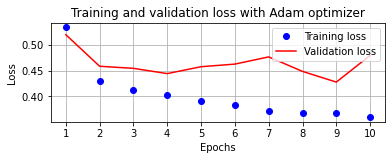

C:\Users\hp\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


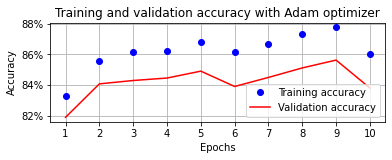

In [19]:
epochs = np.arange(10)+1

plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()